# **Project: Perform Facial Recognition with Deep Learning in Keras Using CNN**

Name: Daniel Manova
<br>Date: 29-08-2021
<br>Course: Post Graduate Program in AI and Machine Learning
<br>Cohort : PGP AIML FEB 2021 Cohort 1
<br>

**Problem Statement:** Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.

**Objective:** Use a deep convolutional neural network to perform facial recognition using Keras.

**Dataset Details:** ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation. Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

**Steps to be followed:**
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers: 
      *   Convolutional Layer
      *   Pooling Layer
      *   Fully Connected Layer
6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

**Input the required libraries**

In [1]:
# Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import itertools ##

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.metrics import roc_curve,auc ##

# Keras API Tensorflow 2 libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
#from keras.layers.noise import AlphaDropout ##
from tensorflow.keras.optimizers import Adam

from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
#from keras.callbacks import TensorBoard ##
#from keras.utils.np_utils import to_categorical ##

**Load the dataset and normalize**

In [2]:
# Loading Dataset
df = np.load('ORL_faces.npz')

In [3]:
# List the files
print(df.files)

['testY', 'testX', 'trainX', 'trainY']


In [4]:
# Loading train and test dataset (data is already split into ['testY', 'testX', 'trainX', 'trainY'])
x_train = df['trainX']
y_train = df['trainY']
x_test = df['testX']
y_test = df['testY']

In [5]:
# Displaying trainig and test dataset shape
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print('Training dataset shape: ',x_train.shape)
print('Testing dataset shape: ',x_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


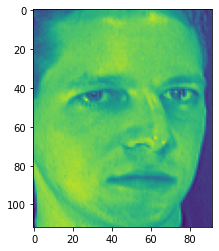

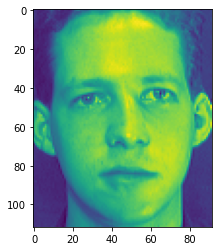

In [6]:
# Viewing an image from tran and test dataset
c=x_train[1].reshape(112,92)
plt.imshow(c)
plt.show()
d=x_test[1].reshape(112,92)
plt.imshow(d)
plt.show()

In [7]:
# Normalizing each image as each image is between 0-255 pixels
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print('Training dataset shape: ',x_train.shape)
print('Testing dataset shape: ',x_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


**Split the dataset**

In [8]:
# Split is done from Xtrain dataset into x_train and x_valid dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

**Transform the images to equal sizes to feed in CNN**

In [9]:
# While feed images in CNN the size of each image must be same
# Define the shape of image in terms of rows, columns
# To make equal size of all images (train, test, and valid dataset), we will use Reshape function
# Shape of image definition
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [10]:
# Reshape function
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*image_shape)

In [11]:
# Display the reshaped values
print('Training dataset modified shape: ',x_train.shape)
print('Validating dataset modified shape: ',x_valid.shape)
print('Testing dataset modified shape: ',x_test.shape)

Training dataset modified shape:  (216, 112, 92, 1)
Validating dataset modified shape:  (24, 112, 92, 1)
Testing dataset modified shape:  (160, 112, 92, 1)


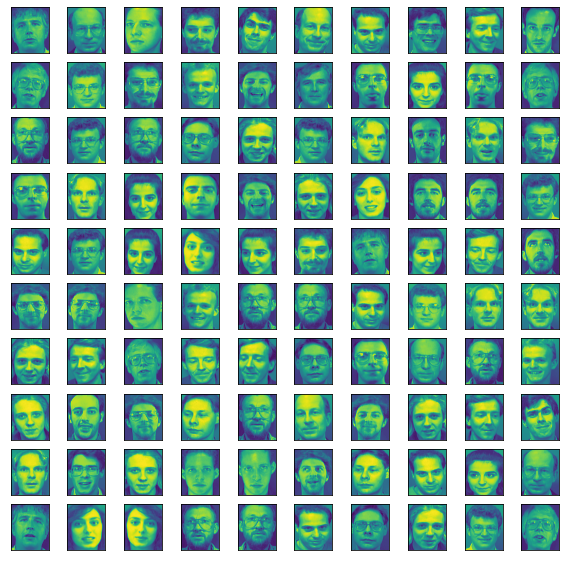

In [12]:
# visualize some images 10 x 10 grid images in gray scale
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze()) # for gray scale
plt.show()

**Build a CNN model that has 3 main layers:**
*   Convolutional Layer
*   Pooling Layer
*   Fully Connected Layer

In [13]:
# Initializing CNN model with activation function, dropout rate, optimizer
def cnn_model(activation,dropout_rate,optimizer):
    model = Sequential() #initialize Sequential model
    
    model.add(Conv2D(32, kernel_size=3,activation=activation,input_shape=image_shape)) #32 filter with kernel size of 3 x 3 with input shape
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64,3, activation=activation)) #64 filter with kernel size of 3 x 3
    model.add(MaxPooling2D(pool_size=2)) #Max pool with size of 2
    
    model.add(Flatten())
    model.add(Dense(2024, activation=activation))
    model.add(Dropout(0.5))
    
    model.add(Dense(1024, activation=activation))
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation=activation))
    model.add(Dropout(0.5))
    
    model.add(Dense(20, activation='softmax')) #Output layer
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #compile model with loss, optimizer chosen and accuracy as metrics
    
    return model

In [14]:
# For Leaky-Rely function we need to define aplha parameters using get_custom_objects
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))}) 

# Defining the type of activation functions to be tested
activation_function = ['elu','relu','leaky-relu']

In [15]:
# Training the models with some activation functions to deside the best model
activation_results = [] #creating an empty matrix for storing results for activations
for activation in activation_function:
    print('\nTraining with {0} activation function:'.format(activation))
    print('------------------------------------------\n')
    
    model = cnn_model(activation=activation,dropout_rate=0.2,optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5
    history = model.fit(np.array(x_train), np.array(y_train), batch_size=512,epochs=75, verbose=1,validation_data=(np.array(x_valid),np.array(y_valid)))    
    activation_results.append(history) #store results
    
    K.clear_session()
    del model
print(activation_results)


Training with elu activation function:
------------------------------------------

Epoch 1/75
1/1 [==============================] - 0s 223ms/step - loss: 3.1679 - accuracy: 0.0463 - val_loss: 5.3582 - val_accuracy: 0.0417
Epoch 2/75
1/1 [==============================] - 0s 104ms/step - loss: 8.1024 - accuracy: 0.0417 - val_loss: 6.3274 - val_accuracy: 0.0417
Epoch 3/75
1/1 [==============================] - 0s 102ms/step - loss: 9.4767 - accuracy: 0.0602 - val_loss: 4.1191 - val_accuracy: 0.0833
Epoch 4/75
1/1 [==============================] - 0s 92ms/step - loss: 5.9572 - accuracy: 0.0602 - val_loss: 7.7156 - val_accuracy: 0.0000e+00
Epoch 5/75
1/1 [==============================] - 0s 97ms/step - loss: 7.7385 - accuracy: 0.0787 - val_loss: 5.3434 - val_accuracy: 0.0417
Epoch 6/75
1/1 [==============================] - 0s 100ms/step - loss: 8.0534 - accuracy: 0.0556 - val_loss: 4.6243 - val_accuracy: 0.0417
Epoch 7/75
1/1 [==============================] - 0s 96ms/step - loss: 6.0

**Plot the result: (All Models Trained)**

In [16]:
# Plot the Model accuracy and Model loss for each activation function used above
activation_list = activation_function[0:]
results_new = activation_results[0:]

def plot_results(activation_results,activation_functions_new =[]):
    plt.figure(figsize=(8,6))
    
    # Model accuracy values plot
    for activation_function in activation_results:
        plt.plot(activation_function.history['val_accuracy'])  
    plt.title('Models Accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('No. of Epochs')
    plt.legend(activation_functions_new)
    plt.grid()
    plt.show()
    
    # Model loss values plot
    plt.figure(figsize=(8,6))
    for activation_function in activation_results:
        plt.plot(activation_function.history['val_loss'])
    plt.title('Models Loss')
    plt.ylabel('Test Loss')
    plt.xlabel('No. of Epochs')
    plt.legend(activation_functions_new)
    plt.grid()
    plt.show()

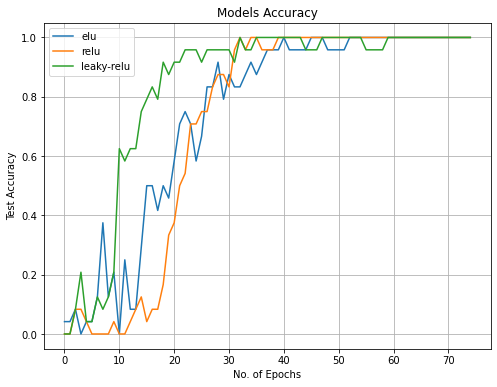

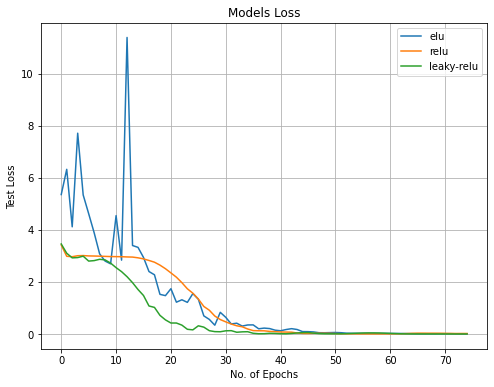

In [17]:
#Plot the results of all 3 models and decide which model to be used
plot_results(results_new, activation_list)

The '**leaky-relu**' and '**relu**' both perform well with minimum loss at lower epochs as compared to '**elu**' activation functions

From the plots above all activation functions converge with minimum loss and high accuracy at training and validation set but '**leaky-relu**' is able to converge for higher accuracy at lower epochs with minimum loss, so we choose '**leaky-relu**' for final model training and plotting results.

**Train the Final model:(leaky-relu)**

In [18]:
activation_func_final ='leaky-relu'
model_final = cnn_model(activation=activation_func_final,dropout_rate=0.2, optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5
history_final = model_final.fit(np.array(x_train), np.array(y_train), batch_size=512, epochs=75, verbose=2, validation_data=(np.array(x_valid),np.array(y_valid)))

Epoch 1/75
1/1 - 1s - loss: 3.0093 - accuracy: 0.0602 - val_loss: 3.5945 - val_accuracy: 0.0417
Epoch 2/75
1/1 - 1s - loss: 4.8915 - accuracy: 0.0741 - val_loss: 3.7294 - val_accuracy: 0.0000e+00
Epoch 3/75
1/1 - 1s - loss: 5.2387 - accuracy: 0.0694 - val_loss: 3.1505 - val_accuracy: 0.0833
Epoch 4/75
1/1 - 1s - loss: 3.7949 - accuracy: 0.0787 - val_loss: 3.0621 - val_accuracy: 0.0000e+00
Epoch 5/75
1/1 - 1s - loss: 3.1320 - accuracy: 0.1157 - val_loss: 2.9402 - val_accuracy: 0.0417
Epoch 6/75
1/1 - 1s - loss: 2.9296 - accuracy: 0.0880 - val_loss: 3.6134 - val_accuracy: 0.0833
Epoch 7/75
1/1 - 1s - loss: 4.7991 - accuracy: 0.0833 - val_loss: 3.1940 - val_accuracy: 0.0417
Epoch 8/75
1/1 - 1s - loss: 3.3442 - accuracy: 0.0741 - val_loss: 2.9397 - val_accuracy: 0.2083
Epoch 9/75
1/1 - 1s - loss: 2.8811 - accuracy: 0.1157 - val_loss: 2.9162 - val_accuracy: 0.1250
Epoch 10/75
1/1 - 1s - loss: 2.8982 - accuracy: 0.1111 - val_loss: 2.8996 - val_accuracy: 0.1250
Epoch 11/75
1/1 - 1s - loss: 2.

In [19]:
# Evaluate the training data's accuracy and loss
training_result_score = model_final.evaluate(np.array(x_train),np.array(y_train),verbose=0)
print('Train Loss (train data) {:.4f}'.format(training_result_score[0]))
print('Train Accuracy (train data) {:.4f}'.format(training_result_score[1]))

Train Loss (train data) 0.0001
Train Accuracy (train data) 1.0000


In [20]:
# Evaluate the validation data's accuracy and loss
validation_result_score = model_final.evaluate(np.array(x_valid),np.array(y_valid),verbose=0)
print('Validation Loss {:.4f}'.format(validation_result_score[0]))
print('Validation Accuracy {:.4f}'.format(validation_result_score[1]))

Validation Loss 0.0071
Validation Accuracy 1.0000


**Plot the result : (leaky-relu)**

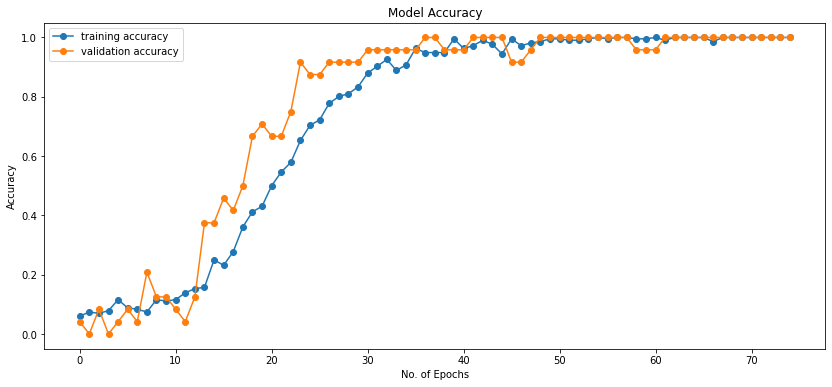

In [21]:
# Training and validation accuracy as per the each ephoce
plt.figure(figsize=(14,6))
plt.plot(history_final.history['accuracy'],marker='o',label='training accuracy')
plt.plot(history_final.history['val_accuracy'],marker='o',label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend()
plt.show()

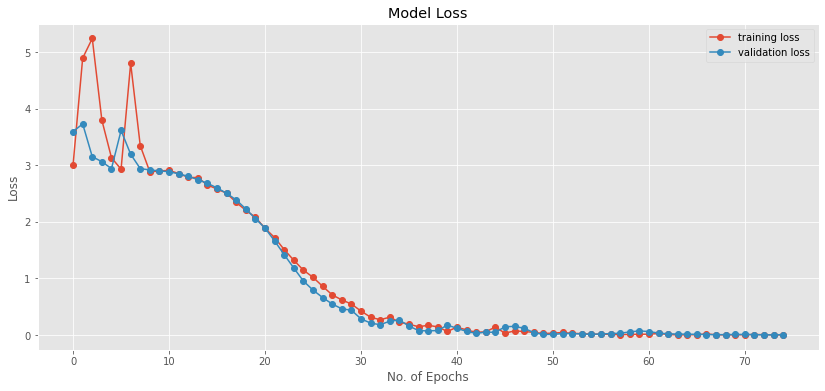

In [22]:
# Training and validation loss as per the each ephoce
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(14,6))
plt.plot(history_final.history['loss'],marker='o',label='training loss')
plt.plot(history_final.history['val_loss'],marker='o',label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend()
plt.show()

In [23]:
# Evaluate the test data's accuracy and loss
test_result_score = model_final.evaluate(np.array(x_test),np.array(y_test),verbose=0)
print('Test Loss: {:.4f}'.format(test_result_score[0]))
print('Test Accuracy: {:.4f}'.format(test_result_score[1]))

Test Loss: 0.2301
Test Accuracy: 0.9500


**Conclusion**
The analysis for different activation functions is first observed to find that 'leaky-relu' activation function is one of the activation functions that can be used for out final model

The model training is done using x_train and y_train with validation data as x_valid and y_valid. However for evaluating model, we use x_test and y_test which gives us **loss** **~0.23** with an **accuracy** of **95%**

**End of the project**